## Part 2: Clinical Application

### Contents
Fill out this notebook as part 2 of your final project submission.

**You will have to complete the Code (Load Metadata & Compute Resting Heart Rate) and Project Write-up sections.**  

- [Code](#Code) is where you will implement some parts of the **pulse rate algorithm** you created and tested in Part 1 and already includes the starter code.
  - [Imports](#Imports) - These are the imports needed for Part 2 of the final project. 
    - [glob](https://docs.python.org/3/library/glob.html)
    - [os](https://docs.python.org/3/library/os.html)
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
  - [Load the Dataset](#Load-the-dataset)  
  - [Load Metadata](#Load-Metadata)
  - [Compute Resting Heart Rate](#Compute-Resting-Heart-Rate)
  - [Plot Resting Heart Rate vs. Age Group](#Plot-Resting-Heart-Rate-vs.-Age-Group)
- [Project Write-up](#Project-Write-Up) to describe the clinical significance you observe from the **pulse rate algorithm** applied to this dataset, what ways/information that could improve your results, and if we validated a trend known in the science community. 

### Dataset (CAST)

The data from this project comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.<sup>1</sup> This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.<sup>2</sup>

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

-----

### Code
#### Imports

When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages are imported for you here. We recommend you don't import other packages outside of the [Standard Library](https://docs.python.org/3/library/) , otherwise the grader might not be able to run your code.

In [1]:
import glob
import os

import numpy as np
import pandas as pd

#### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. You will use these files to compute resting heart rate.

Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. You will use this file to make the association between resting heart rate and age group for each gender.

Find the dataset in `../datasets/crisdb/`

In [2]:
hr_filenames = glob.glob('./datasets/crisdb/*.npz')

#### Load Metadata
Load the metadata file into a datastructure that allows for easy lookups from subject ID to age group and sex.

In [3]:
metadata_filename = './datasets/crisdb/metadata.csv'

# Load the metadata file into this variable.
with open(metadata_filename, 'r') as f:
    metadata = pd.read_csv(metadata_filename)
    
metadata.head()

,subject,age,sex
0,e198a,20-24,Male
1,e198b,20-24,Male
2,e028b,30-34,Male
3,e028a,30-34,Male
4,e061b,30-34,Male


#### Compute Resting Heart Rate
For each subject we want to compute the resting heart rate while keeping track of which age group this subject belongs to. An easy, robust way to compute the resting heart rate is to use the lowest 5th percentile value in the heart rate timeseries.

In [4]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    hr_data = np.load(filename)['hr']
    
    # Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(hr_data, 5)

    # Find the subject ID from the filename.
    subject = filename[filename.rfind("/") + 1:-4]

    # Find the age group for this subject in metadata.
    age_group = metadata.age[metadata.subject == subject].iloc[0]
    
    # Find the sex for this subject in metadata.
    sex = metadata.sex[metadata.subject == subject].iloc[0]

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata, filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])

df.head()

,age_group,sex,rhr
0,50-54,Male,97.215190
1,45-49,Male,50.426894
2,70-74,Female,56.883959
3,65-69,Female,57.528897
4,55-59,Male,58.185158


#### Plot Resting Heart Rate vs. Age Group
We'll use [seaborn](https://seaborn.pydata.org/) to plot the relationship. Seaborn is a thin wrapper around matplotlib, which we've used extensively in this class, that enables higher-level statistical plots.

We will use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) to plot the mean of the resting heart rates for each age group along with the 95% confidence interval around the mean. Learn more about making plots that show uncertainty [here](https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty).

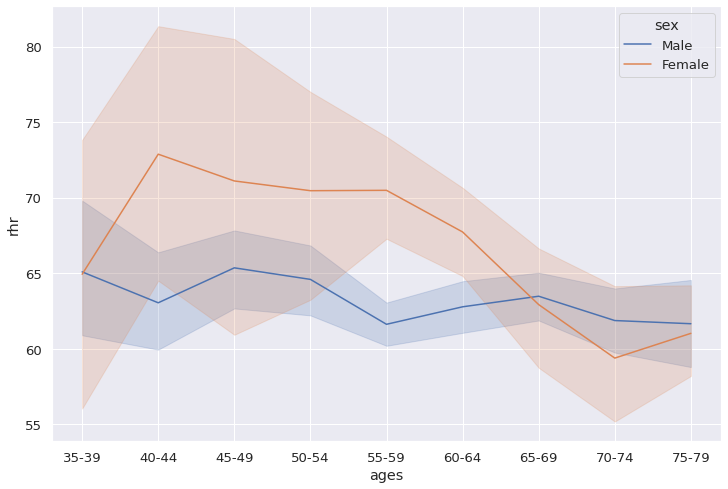

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['ages'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='ages', y='rhr', hue='sex', data=df)
_ = plt.xticks(np.arange(len(labels)), labels)

### Clinical Conclusion
Answer the following prompts to draw a conclusion about the data.
> 1. For women, we see .... 
> 2. For men, we see ... 
> 3. In comparison to men, women's heart rate is .... 
> 4. What are some possible reasons for what we see in our data?
> 5. What else can we do or go and find to figure out what is really happening? How would that improve the results?
> 6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?

Your write-up will go here...

1. For women we see that they represent only \~18% of the data, with most of the female subjects bewteen 55 and 74 years old. According to the first plot the heart rate variance changes a lot with the ages, the highest one (\~18) being between ages 35 and 49 and the smallest one bewteen 55 and 64. Women's heart rate tend to increase bewteen gaes 35 and 44, and remains fairly constant from ages 45 to 59. Finally it decays regularly from ages 55 to 74.

2. For men we see that they represent most of the data subjects (\~82%), with most of the male subjects, as for women, bewteen ages 55 and 74. According to the first plot the highest heart rate variance (\~7) is for men between ages 35 and 44. Men's heart rate remains almost constant through all their live by just showing a small drop after age of 55.

3. In comparison to men, women's heart rate show a higher variance for all ages and the heart rate is higher between ages 35 and 65. After 65, mens heart rate is slightly higher that women's heart rate.

4. We may see a higher variation for women's data for two may reasons:
    a. Their sample size is to small compared to men and skewed to older ages according to plots below. So there is not enough data to get a real picture of what is gping on.
    b. The second reason is more biological. Women's bodies are more complex than men's bodies and are subject to drastic hormonal changes through most of their live. This seems to be in accordance with the trend in the plot above, where women before the age of menopause show a higher heart rate and variance.
    
5. We can increase the population of women subjects but also it would be ideal to follow their heart rate for several menstrual cycles. If a woman doesn't want to share in which stage of the cycle they are, then it would be a good idea also to follow their temperature. Also we will need to increase the subjects for ages younger than 55 for both men and women. The ideal situation would be to have around the same amount of male and female subjects for all ages. These changes increase the confidence of what the plots may show.

6. In one hand for men, from the plot above, the data doesn't strongly suggest that the average resting heart rate increases up until middle age and then decreases into old age. On the other hand for women, the data suggests that the average resting heart rate increases up until middle age and then decreases into old age, but their sample size is too small to draw a conclusion. So, in conclusion, we didn't validate the trend that average resting heart rate increases up until middle age and then decreases into old age.

Total female population: 18.02%
Total male population: 81.98%


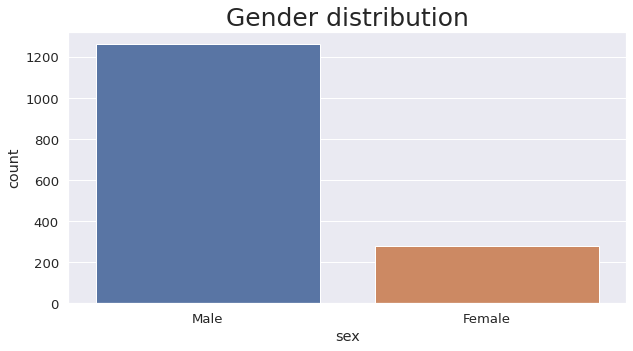

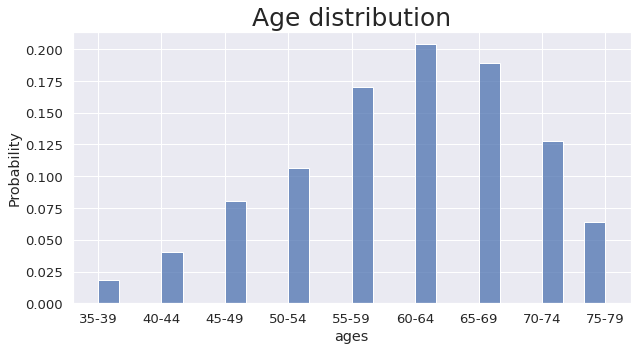

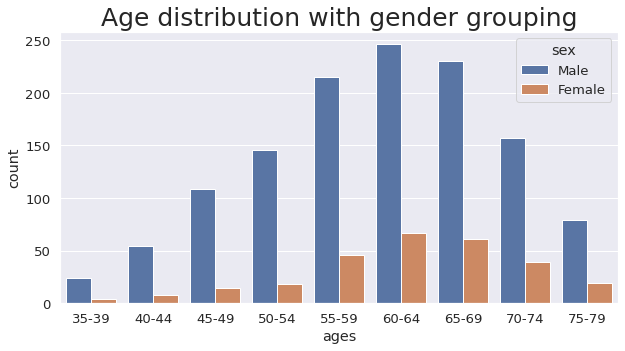

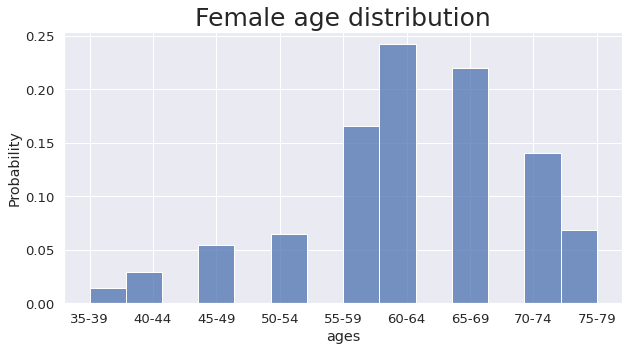

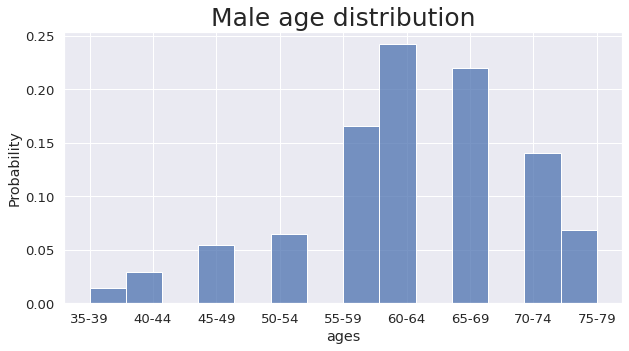

Ages 35-39:
	Females: 14.29%
	Males: 85.71%
Ages 40-44:
	Females: 12.90%
	Males: 87.10%
Ages 45-49:
	Females: 12.10%
	Males: 87.90%
Ages 50-54:
	Females: 10.98%
	Males: 89.02%
Ages 55-59:
	Females: 17.62%
	Males: 82.38%
Ages 60-64:
	Females: 21.41%
	Males: 78.59%
Ages 65-69:
	Females: 20.96%
	Males: 79.04%
Ages 70-74:
	Females: 19.90%
	Males: 80.10%
Ages 75-79:
	Females: 19.39%
	Males: 80.61%
Ages 35-39:
	Females: 14.29%
	Males: 85.71%
Ages 40-44:
	Females: 12.90%
	Males: 87.10%
Ages 45-49:
	Females: 12.10%
	Males: 87.90%
Ages 50-54:
	Females: 10.98%
	Males: 89.02%
Ages 55-59:
	Females: 17.62%
	Males: 82.38%
Ages 60-64:
	Females: 21.41%
	Males: 78.59%
Ages 65-69:
	Females: 20.96%
	Males: 79.04%
Ages 70-74:
	Females: 19.90%
	Males: 80.10%
Ages 75-79:
	Females: 19.39%
	Males: 80.61%


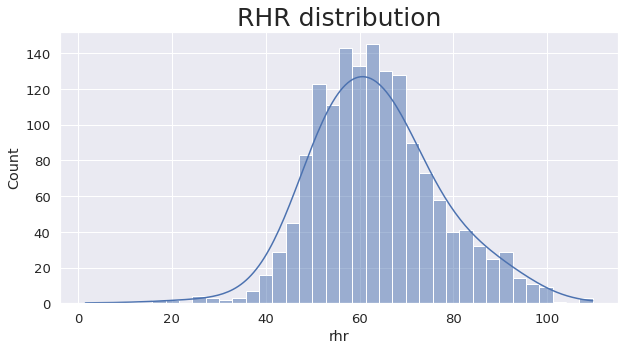

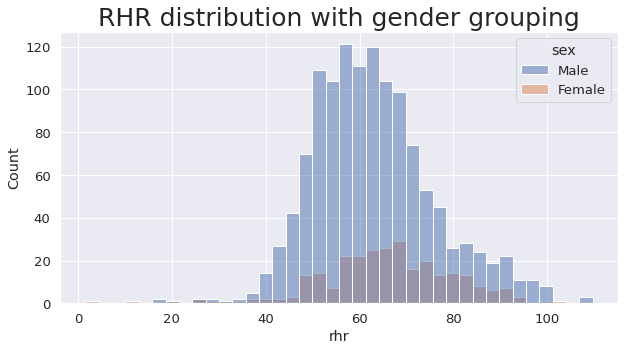

In [58]:
sns.set(font_scale=1.2)

print("Total female population: %.2f%%"%(len(df.sex[df.sex == 'Female']) / len(df) * 100))
print("Total male population: %.2f%%"%(len(df.sex[df.sex == 'Male']) / len(df) * 100))

plt.figure(figsize=(10,5))
_ = sns.countplot(x="sex", data=df)
_ = plt.title("Gender distribution", size=25)
_ = plt.show()

plt.figure(figsize=(10,5))
_ = sns.histplot(df.ages, stat='probability')
_ = plt.xticks(np.arange(len(labels)), labels)
_ = plt.title("Age distribution", size=25)
_ = plt.show()

plt.figure(figsize=(10,5))
_ = sns.countplot(x="ages", hue="sex", data=df)
_ = plt.xticks(np.arange(len(labels)), labels)
_ = plt.title("Age distribution with gender grouping", size=25)
_ = plt.show()

plt.figure(figsize=(10,5))
_ = sns.histplot(df.ages[df.sex == "Female"], stat='probability')
_ = plt.xticks(np.arange(len(labels)), labels)
_ = plt.title("Female age distribution", size=25)
_ = plt.show()

plt.figure(figsize=(10,5))
_ = sns.histplot(df.ages[df.sex == "Female"], stat='probability')
_ = plt.xticks(np.arange(len(labels)), labels)
_ = plt.title("Male age distribution", size=25)
_ = plt.show()

for key, value in sorted(dict(df.age_group.value_counts()).items()):
    filt_gen1 = (df.sex == 'Female')
    filt_gen2 = (df.sex == 'Male')
    filt_age = (df.age_group == key)
    print("Ages {}:".format(key))
    print("\tFemales: %.2f%%"%(len(df.sex[filt_gen1 & filt_age]) / value * 100))
    print("\tMales: %.2f%%"%(len(df.sex[filt_gen2 & filt_age]) / value * 100))
    
for key, value in sorted(dict(df.age_group.value_counts()).items()):
    filt_gen1 = (df.sex == 'Female')
    filt_gen2 = (df.sex == 'Male')
    filt_age = (df.age_group == key)
    print("Ages {}:".format(key))
    print("\tFemales: %.2f%%"%(len(df.sex[filt_gen1 & filt_age]) / value * 100))
    print("\tMales: %.2f%%"%(len(df.sex[filt_gen2 & filt_age]) / value * 100))
    
plt.figure(figsize=(10,5))
_ = sns.histplot(df.rhr, kde=True, kde_kws={'bw_adjust': 2})
_ = plt.title("RHR distribution", size=25)
_ = plt.show()

plt.figure(figsize=(10,5))
_ = sns.histplot(x="rhr", hue="sex", data=df)
_ = plt.title("RHR distribution with gender grouping", size=25)
_ = plt.show()